In [3]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import dataPreprocessing as dp


import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [5]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

2019-08-29 01:10:06,870 | INFO : sil=0.309045, chs=2858.836130
2019-08-29 01:10:07,552 | INFO : sil=0.323178, chs=2909.703932
2019-08-29 01:10:08,325 | INFO : sil=0.346667, chs=2952.227804
2019-08-29 01:10:09,033 | INFO : sil=0.346157, chs=2929.503752
2019-08-29 01:10:09,763 | INFO : sil=0.355901, chs=2945.255343
2019-08-29 01:10:10,499 | INFO : sil=0.355632, chs=2986.096968
2019-08-29 01:10:11,246 | INFO : sil=0.372652, chs=3060.722145
2019-08-29 01:10:12,004 | INFO : sil=0.398330, chs=3171.723353
2019-08-29 01:10:12,736 | INFO : sil=0.404833, chs=3225.866489
2019-08-29 01:10:13,550 | INFO : sil=0.394514, chs=3283.042051
2019-08-29 01:10:14,300 | INFO : sil=0.394384, chs=3303.207151
2019-08-29 01:10:15,091 | INFO : sil=0.386595, chs=3320.113867
2019-08-29 01:10:15,870 | INFO : sil=0.389274, chs=3290.992599
2019-08-29 01:10:16,654 | INFO : sil=0.382580, chs=3274.942349
2019-08-29 01:10:17,454 | INFO : sil=0.385615, chs=3272.738396


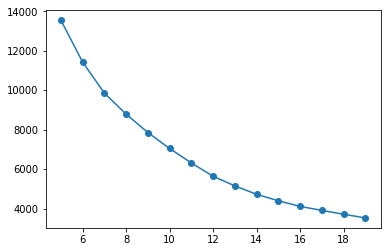

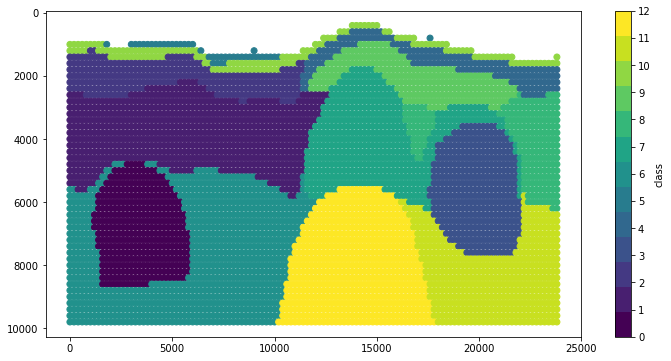

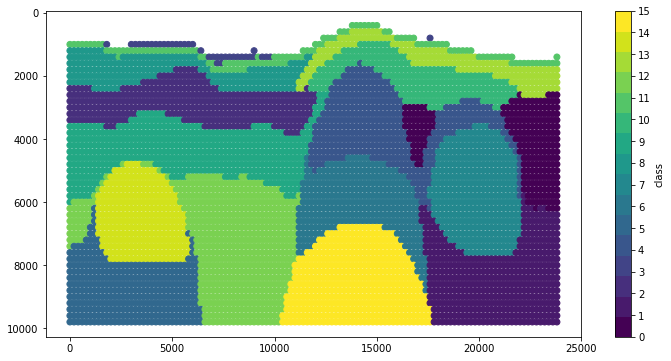

In [7]:
in_range = range(5,20)
cluster_labels, avg_sils, ch_scs, SSE, best_idx = mh.iter_kmean(norm_data, in_range)

for c in cluster_labels[best_idx]:
    mh.plot_e_model(c, x, z, sep_label=True)

In [8]:
model = 'M5a'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

2019-08-29 01:10:56,978 | INFO : sil=0.328924, chs=2537.134367
2019-08-29 01:10:57,716 | INFO : sil=0.342569, chs=2641.908178
2019-08-29 01:10:58,497 | INFO : sil=0.353474, chs=2601.044948
2019-08-29 01:10:59,218 | INFO : sil=0.354220, chs=2624.410265
2019-08-29 01:10:59,990 | INFO : sil=0.357726, chs=2647.629289
2019-08-29 01:11:00,709 | INFO : sil=0.351754, chs=2691.585424
2019-08-29 01:11:01,405 | INFO : sil=0.369850, chs=2839.193454
2019-08-29 01:11:02,144 | INFO : sil=0.384062, chs=2982.320082
2019-08-29 01:11:02,898 | INFO : sil=0.388816, chs=3003.455192
2019-08-29 01:11:03,679 | INFO : sil=0.373300, chs=3018.778799
2019-08-29 01:11:04,482 | INFO : sil=0.377807, chs=3021.479731
2019-08-29 01:11:05,251 | INFO : sil=0.379170, chs=3008.816215
2019-08-29 01:11:06,051 | INFO : sil=0.373889, chs=3030.743448
2019-08-29 01:11:06,945 | INFO : sil=0.374193, chs=3031.480020
2019-08-29 01:11:07,798 | INFO : sil=0.374240, chs=2988.406922


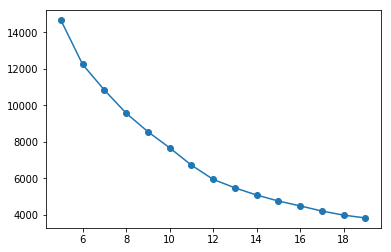

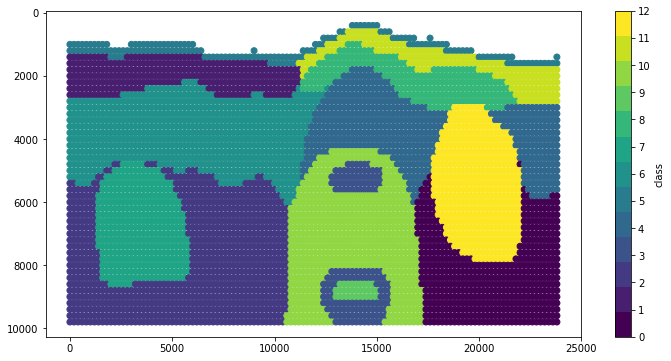

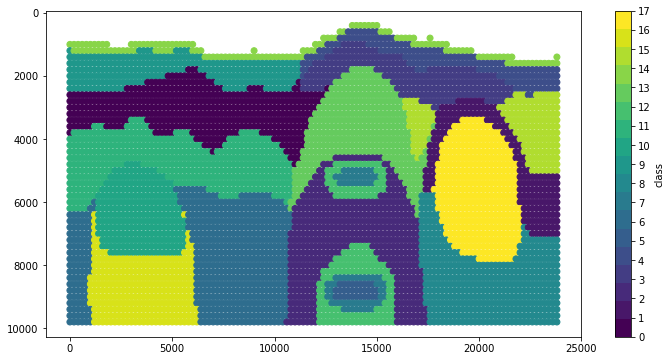

In [9]:
in_range = range(5,20)
cluster_labels_2, avg_sils_2, ch_scs_2, SSE_2, best_idx_2 = mh.iter_kmean(norm_data, in_range)

for c in cluster_labels_2[best_idx_2]:
    mh.plot_e_model(c, x, z, sep_label=True)